# Exploratory Data Analysis - on Emission Reports to EPA by GHGRP 

    1. Introduction
    2. Imports
    3. Loading the data
    4. Direct Emissions trend by States
    5. Direct Emissions trend by IT Sectors
    
    



### 1. Introduction

With the emission reports submitted by GHGRP(Greenhouse Gases Reporting Program) to EDA(Environmental Protection Agency of United States) over the past decade, 2011-2020, we are trying to see the pattern of how the emission has been taken care of by various industries in the different states of US. There has been some data missing in the earlier industries, as more industries started to report the emissions data in the recent years. So, this missing data has been handled by imputing the mean value of the emissions, thereby minimizing the effect of these imputed values on the original data. 

We are trying to see how the industries have been doing with the emissions and also eventually figure out and predict how the emissions will be after this decade, by 2030. EDA aims phasing down production and consumption by 85 percent over the next 15 years, maximizing reclamation and minimizing releases from equipment, and facilitating the transition to next-generation technologies through sector-based restrictions. A global HFC phasedown is expected to avoid up to 0.5° Celsius of global warming by 2100.


### 2. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


In [3]:
df_de =pd.read_excel('data.xlsx',sheet_name='sheet1',index_col=0)
df_sf6 =pd.read_excel('data.xlsx',sheet_name='sheet2',index_col=0)
df_oog=pd.read_excel('data.xlsx',sheet_name='sheet3',index_col=0)
df_ldc=pd.read_excel('data.xlsx',sheet_name='sheet4',index_col=0)
df_de.index.rename('Fac_Id',inplace=True)
df_sf6.index.rename('Fac_Id',inplace=True)
df_ldc.index.rename('Fac_Id',inplace=True)
df_oog.index.rename('Fac_Id',inplace=True)


In [4]:
df_de.head()

,FRS_Id,Facility_Name,City,State,Zip Code,Address,County,Latitude,Longitude,Primary_NAICS_Code,...,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
Fac_Id,,,,,,,,,,,,,,,,,,,,,
1004377,1.100438e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.298570,-96.535860,562212,...,504064.000,518680.250,653854.000000,250497.500000,221014.750000,199011.750000,241883.500000,289953.250000,204000.000000,194000.000000
1000112,1.100198e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663000,-74.000000,221112,...,60819.700,44658.384,70705.288000,52698.656000,66797.352000,67399.252000,40722.200000,102599.220000,68984.744000,100591.828000
1013621,1.100708e+11,3Bear Libby Gas Plant,Hobbs,NM,88240,674 Marathon Rd,LEA COUNTY,32.540693,-103.522351,211130,...,40521.812,38691.478,435280.099943,431488.809907,447423.757318,467277.995747,491686.293592,500278.254166,507639.706331,534026.861412
1003742,1.100104e+11,31st Street Landfill,WESTCHESTER,IL,60154,11700 W 31ST ST,COOK COUNTY,41.835129,-87.915924,562212,...,100500.948,18925.400,31220.150000,29026.800000,120657.600000,92696.600000,120707.350000,97467.500000,87357.750000,95113.250000
1003188,1.100006e+11,3M BROWNWOOD,BROWNWOOD,TX,76801,4501 HIGHWAY 377 SOUTH,BROWN COUNTY,31.671177,-98.996513,326113,...,29359.640,30571.636,34432.420000,36202.264000,31773.480000,36754.712000,36419.864000,34821.820000,33671.924000,37149.360000


In [5]:
df_de.columns

Index(['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011'],
      dtype='object')

In [6]:
df_de_group = df_de.groupby('State')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_de_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, AK to WY
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    54 non-null     float64
 1   2019    54 non-null     float64
 2   2018    54 non-null     float64
 3   2017    54 non-null     float64
 4   2016    54 non-null     float64
 5   2015    54 non-null     float64
 6   2014    54 non-null     float64
 7   2013    54 non-null     float64
 8   2012    54 non-null     float64
 9   2011    54 non-null     float64
dtypes: float64(10)
memory usage: 4.6+ KB


In [7]:
df_de_group.describe()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01
mean,341519.065185,373414.029815,397565.381667,397353.626111,414912.537222,436718.639630,456891.439259,465164.853519,477648.179630,5.188616e+05
std,160845.240990,174789.235984,186897.263877,185616.317257,187268.665755,195600.449659,202133.595801,201888.766538,201715.149215,2.399984e+05
min,59417.180000,63455.640000,68642.990000,81703.720000,85414.820000,94672.340000,91641.670000,94677.980000,107202.080000,1.173564e+05
25%,255241.385000,276539.762500,264171.417500,263396.805000,268903.050000,290582.885000,299988.907500,294338.020000,325380.107500,3.648028e+05
50%,319187.815000,343344.105000,380908.440000,378141.555000,397191.230000,419423.655000,454315.090000,471625.920000,470430.760000,5.099477e+05
75%,421860.850000,454283.352500,485810.687500,452241.982500,481361.685000,516291.002500,531641.140000,562387.577500,560031.542500,6.063037e+05
max,776126.140000,808391.500000,878193.550000,892322.330000,856710.420000,915502.800000,926881.760000,989476.920000,983929.120000,1.373103e+06


We can notice that the average direct emissions has come down from 518301 metric tons to 341519 metric tons over the decade.

In [9]:
df_de_group.sort_values(by='2020',ascending =False)

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,,,,,,,,,,
WY,776126.14,808391.50,878193.55,892322.33,856710.42,915502.80,926881.76,989476.92,983929.12,963811.98
PR,696112.75,625328.24,573758.37,556996.86,697742.95,804091.18,782278.04,805878.82,882734.37,934894.98
FL,692818.77,694640.28,776893.27,751406.71,766308.24,758304.39,757632.32,726163.05,760897.39,804265.35
MO,637050.23,672098.60,732764.01,773481.87,710799.37,750499.37,803290.61,833318.76,838128.63,899409.46
IN,583083.48,675722.35,758857.18,729155.23,744073.41,750705.49,840281.82,827593.48,830356.06,855324.65
ND,580395.25,615146.86,674565.09,644213.03,646100.53,679076.56,644829.38,694738.19,752845.07,764197.54
WV,569000.49,664185.86,716029.37,792153.65,835915.83,806055.90,841746.14,820841.32,818027.23,869435.19
MT,518496.09,745868.36,706961.20,732524.34,768073.90,834736.09,796977.24,758300.13,755540.98,780666.63
UT,510993.04,554437.81,576151.47,573405.94,579319.90,664224.72,674353.70,683702.75,628713.60,657320.89


In [11]:
df_de_group.sort_values(by='2011',ascending =False)

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,,,,,,,,,,
VI,268431.88,196494.48,169029.52,163588.02,227261.80,222925.77,216450.09,229646.84,394947.35,1373102.81
WY,776126.14,808391.50,878193.55,892322.33,856710.42,915502.80,926881.76,989476.92,983929.12,963811.98
PR,696112.75,625328.24,573758.37,556996.86,697742.95,804091.18,782278.04,805878.82,882734.37,934894.98
KY,494451.58,585618.34,649977.34,644835.70,694570.40,749634.50,822944.33,818185.53,829946.00,908273.21
MO,637050.23,672098.60,732764.01,773481.87,710799.37,750499.37,803290.61,833318.76,838128.63,899409.46
WV,569000.49,664185.86,716029.37,792153.65,835915.83,806055.90,841746.14,820841.32,818027.23,869435.19
IN,583083.48,675722.35,758857.18,729155.23,744073.41,750705.49,840281.82,827593.48,830356.06,855324.65
FL,692818.77,694640.28,776893.27,751406.71,766308.24,758304.39,757632.32,726163.05,760897.39,804265.35
MT,518496.09,745868.36,706961.20,732524.34,768073.90,834736.09,796977.24,758300.13,755540.98,780666.63


Comparing both the tables,We can see that Wyoming tops the list in the 2020-2017.. other states seems to have reduced the direct emission better than Wyoming. 

In [10]:
df_de_state = pd.melt(df_de_group,ignore_index=False,var_name='Year',value_name="Emission in metric tons")


In [84]:
df_de_state_max = df_de_state[df_de_state['Emission in metric tons']== df_de_state['Emission in metric tons'].max()]
df_de_state_max

,Year,Emission in metric tons
State,,
VI,2011,1373102.81


In [85]:
df_de_state_min = df_de_state[df_de_state['Emission in metric tons']== df_de_state['Emission in metric tons'].min()]
df_de_state_min

,Year,Emission in metric tons
State,,
DC,2020,59417.18


In [86]:
df_de_state.sort_values(by='Year', ascending=False)

,Year,Emission in metric tons
State,,
AK,2020,227011.06
SC,2020,326637.72
NE,2020,370176.80
NH,2020,128043.94
NJ,2020,232690.46
...,...,...
MD,2011,512797.89
ME,2011,295204.89
MI,2011,471646.38


<AxesSubplot:xlabel='Year', ylabel='Emission in metric tons'>

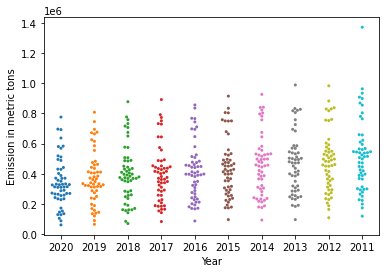

In [87]:
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= df_de_state)

In [88]:
df_de_state.groupby('Year').min().sort_values(by=['Year','Emission in metric tons'])

,Emission in metric tons
Year,
2011,117356.44
2012,107202.08
2013,94677.98
2014,91641.67
2015,94672.34
2016,85414.82
2017,81703.72
2018,68642.99
2019,63455.64


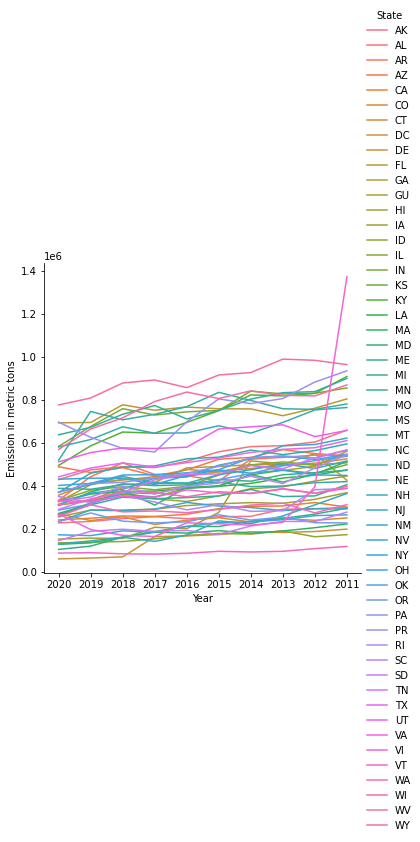

In [89]:
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=df_de_state )

Both the plot and the trend above show that almost all the States consistently showing a reduction in the emission levels. 

In [90]:
df_de_it_sec = df_de.groupby('IT_sectors')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_de_it_sec.describe()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01
mean,1.491950e+06,1.568212e+06,1.617135e+06,1.569384e+06,1.583370e+06,1.645018e+06,1.651817e+06,1.687177e+06,1.665998e+06,1.686357e+06
std,1.867757e+06,1.939223e+06,1.968377e+06,1.924594e+06,1.936530e+06,2.003390e+06,1.992219e+06,2.049031e+06,2.016930e+06,2.080075e+06
min,2.804500e+02,1.892000e+02,3.068500e+02,3.581500e+02,2.950500e+02,4.840000e+01,2.807500e+02,1.575940e+03,2.787000e+02,2.597000e+02
25%,9.116006e+04,1.077157e+05,1.214967e+05,1.492012e+05,1.624602e+05,1.754746e+05,1.974780e+05,2.074177e+05,2.524441e+05,2.841495e+05
50%,4.784886e+05,7.082570e+05,7.488351e+05,7.198152e+05,6.634311e+05,7.037434e+05,7.386794e+05,7.457140e+05,7.589737e+05,7.502238e+05
75%,2.207703e+06,2.268102e+06,2.214498e+06,2.169771e+06,2.375431e+06,2.397181e+06,2.227839e+06,2.258289e+06,2.254042e+06,2.434158e+06
max,6.558090e+06,7.655594e+06,6.973092e+06,7.115795e+06,7.195194e+06,7.192878e+06,7.229060e+06,7.387407e+06,7.276498e+06,7.303151e+06


In [91]:
df_de_it_sec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Chemicals to Waste
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    62 non-null     float64
 1   2019    62 non-null     float64
 2   2018    62 non-null     float64
 3   2017    62 non-null     float64
 4   2016    62 non-null     float64
 5   2015    62 non-null     float64
 6   2014    62 non-null     float64
 7   2013    62 non-null     float64
 8   2012    62 non-null     float64
 9   2011    62 non-null     float64
dtypes: float64(10)
memory usage: 5.3+ KB


In [92]:
df_de_it_sec

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
IT_sectors,,,,,,,,,,
Chemicals,318311.27,329385.94,328702.97,324480.95,329337.19,336876.95,330480.84,322470.81,325388.41,335506.59
"Chemicals,Coal-based Liquid Fuel Supply,Suppliers of CO2",3230507.30,3137752.80,4082335.70,3234852.90,3326537.68,2882904.74,1246360.40,2123868.34,2858253.86,3042548.26
"Chemicals,Industrial Gas Suppliers",281269.82,354742.82,318417.08,366002.53,374851.51,420594.74,459221.66,612975.65,741325.44,765778.10
"Chemicals,Industrial Gas Suppliers,Minerals",49540.27,32126.48,40325.94,33796.91,41687.84,45416.31,66306.63,64664.11,56198.97,73653.20
"Chemicals,Industrial Gas Suppliers,Waste",32761.46,42333.54,54078.74,103988.20,50211.76,655440.68,761651.07,1012023.50,869407.86,831665.61
...,...,...,...,...,...,...,...,...,...,...
"Pulp and Paper,Suppliers of CO2",154517.58,164000.67,164948.70,179059.19,168043.14,150743.05,137932.10,187547.13,195988.99,190688.30
"Pulp and Paper,Suppliers of CO2,Waste",312713.12,349385.39,339695.40,338360.86,326747.51,330128.24,333036.55,305391.51,339904.72,227803.38
"Pulp and Paper,Waste",294747.95,297064.66,297981.25,299540.50,321761.61,315879.34,318441.43,324005.87,342774.13,354670.19


In [93]:
df_de_it_0 = pd.melt(df_de_it_sec,ignore_index=False,var_name='Year',value_name="Emission in metric tons")
df_de_it = df_de_it_0.reset_index()
df_de_it.head()

,IT_sectors,Year,Emission in metric tons
0,Chemicals,2020,318311.27
1,"Chemicals,Coal-based Liquid Fuel Supply,Suppli...",2020,3230507.30
2,"Chemicals,Industrial Gas Suppliers",2020,281269.82
3,"Chemicals,Industrial Gas Suppliers,Minerals",2020,49540.27
4,"Chemicals,Industrial Gas Suppliers,Waste",2020,32761.46


<AxesSubplot:xlabel='Year', ylabel='Emission in metric tons'>

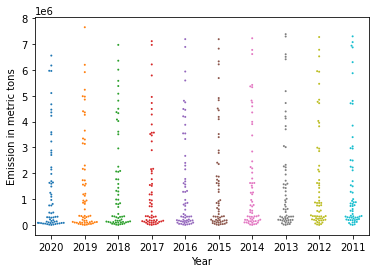

In [94]:
sns.swarmplot(x='Year', y='Emission in metric tons', size= 2, data= df_de_it_0)

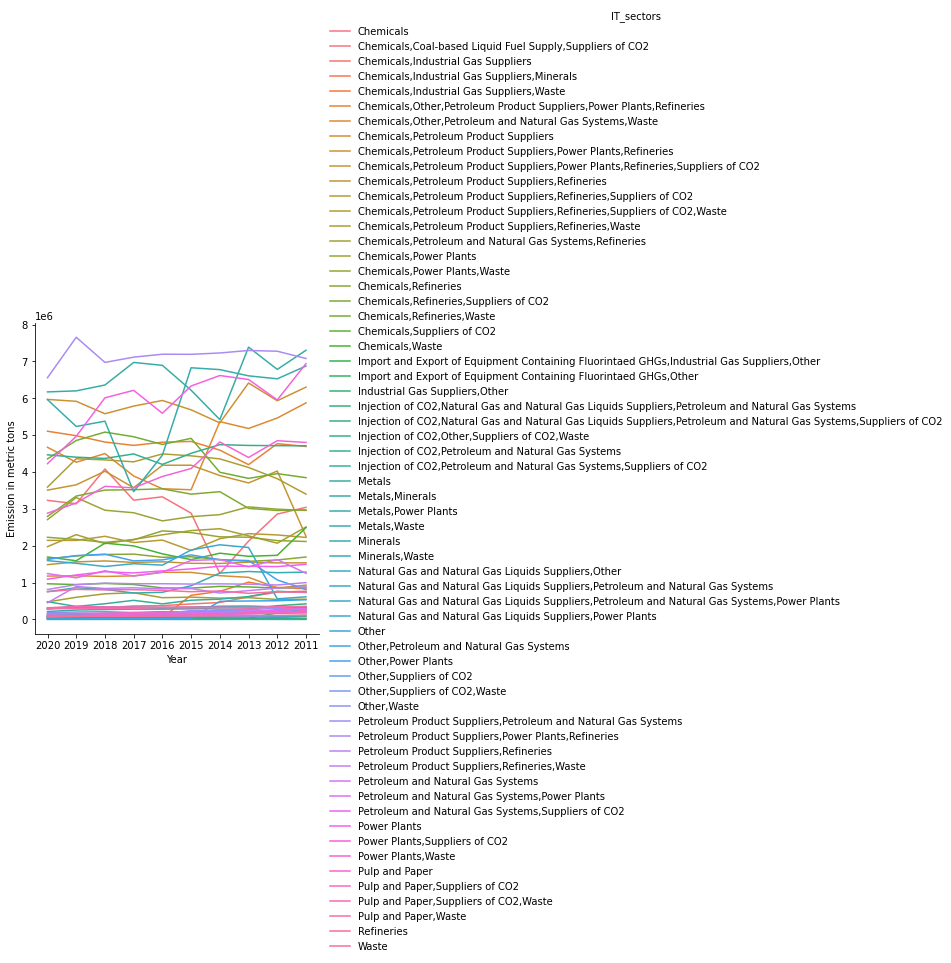

In [95]:
sns.relplot(x='Year', y='Emission in metric tons', data=df_de_it_0, kind='line', hue='IT_sectors')

The plot and the trends above on the emission by IT sectors in the decade 2011 - 2020 show that a few of them have significantly reduced over others. 

In [96]:
df_de_it_st_0 = df_de.groupby(['State','IT_sectors'])[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))


In [97]:
df_de_it_st_0.head()

2020  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     85459.44   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  475952.98   
      Other                                                84518.85   
      Petroleum Product Suppliers,Refineries              183045.13   
      Petroleum and Natural Gas Systems                   453520.61   

                                                               2019  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     85877.31   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  600981.03   
      Other                                                76957.84   
      Petroleum Product Suppliers,Refineries              202376.40   
      Petroleum and Natural Gas Systems                   445897.42   

                                                               2018  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     79770.61   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  695400.30   
      Other                                               135133.68   
      Petroleum Product Suppliers,Refineries              205750.48   
      Petroleum and Natural Gas Systems                   444387.77   

                                                               2017  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     73953.38   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  723807.79   
      Other                                               137083.32   
      Petroleum Product Suppliers,Refineries              199390.18   
      Petroleum and Natural Gas Systems                   442243.90   

                                                               2016  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     72235.88   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  589663.71   
      Other                                               108366.96   
      Petroleum Product Suppliers,Refineries              187904.77   
      Petroleum and Natural Gas Systems                   447281.86   

                                                               2015  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     80653.72   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  604584.14   
      Other                                               111860.71   
      Petroleum Product Suppliers,Refineries              190899.49   
      Petroleum and Natural Gas Systems                   458422.66   

                                                               2014  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries    114751.11   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  577309.02   
      Other                                               115089.78   
      Petroleum Product Suppliers,Refineries              193758.65   
      Petroleum and Natural Gas Systems                   438472.14   

                                                               2013  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries    105020.37   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  590568.96   
      Other                                               151755.29   
      Petroleum Product Suppliers,Refineries              179286.89   
      Petroleum and Natural Gas Systems                   457758.32   

                                                               2012       2011 

In [98]:
df_de_it_st_0.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 626 entries, ('AK', 'Chemicals,Petroleum Product Suppliers,Refineries') to ('WY', 'Waste')
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    626 non-null    float64
 1   2019    626 non-null    float64
 2   2018    626 non-null    float64
 3   2017    626 non-null    float64
 4   2016    626 non-null    float64
 5   2015    626 non-null    float64
 6   2014    626 non-null    float64
 7   2013    626 non-null    float64
 8   2012    626 non-null    float64
 9   2011    626 non-null    float64
dtypes: float64(10)
memory usage: 51.1+ KB


In [99]:
df_de_it_st = pd.melt(df_de_it_st_0,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()
df_de_it_st.columns
df_de_it_st.head()

,State,IT_sectors,Year,Emission in metric tons
0,AK,"Chemicals,Petroleum Product Suppliers,Refineries",2020,85459.44
1,AK,"Chemicals,Petroleum and Natural Gas Systems,Re...",2020,475952.98
2,AK,Other,2020,84518.85
3,AK,"Petroleum Product Suppliers,Refineries",2020,183045.13
4,AK,Petroleum and Natural Gas Systems,2020,453520.61


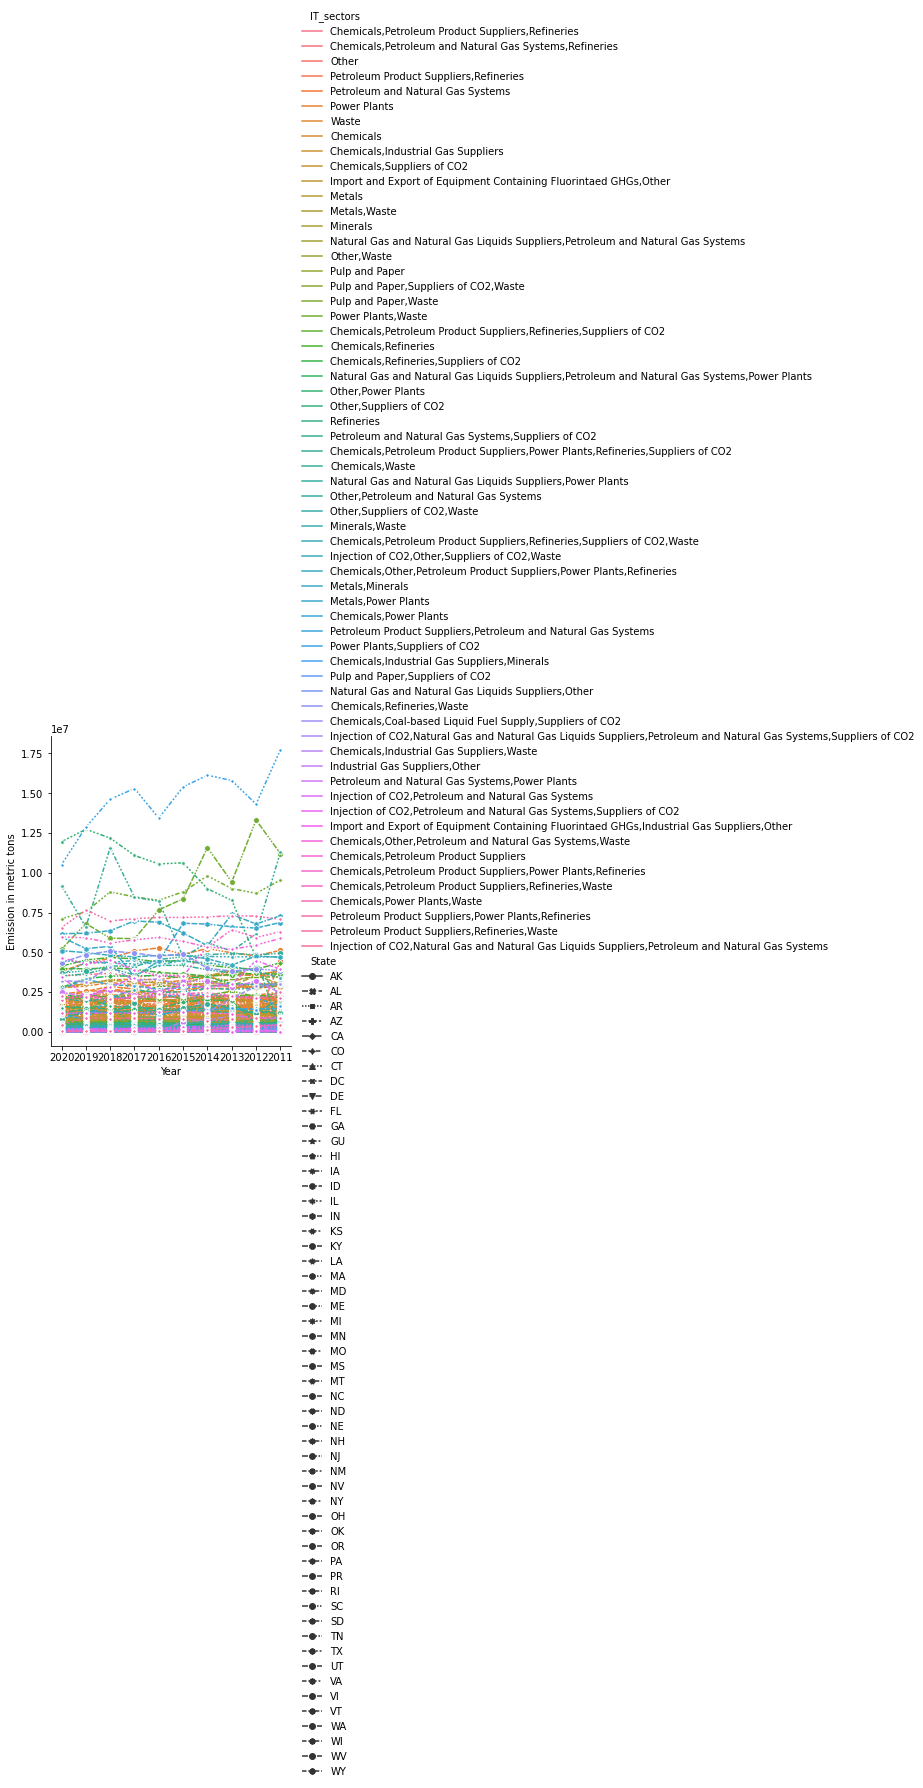

In [100]:
sns.relplot(x='Year', y='Emission in metric tons', hue='IT_sectors', style = "State", kind='line', markers= True, data=df_de_it_st)

Significant reduction is seen in the amount of direct emissions by State over this past decade, though the trend with respect to the industry sectors has no such trend. 

In [101]:
df_de_state_2020 = df_de_state[df_de_state['Year']=='2020']
df_de_state_2011 = df_de_state[df_de_state['Year']=='2011']

print('Change in emission % by all states from 2011 to 2020', round((df_de_state_2020['Emission in metric tons'] - df_de_state_2011['Emission in metric tons'])/df_de_state_2011['Emission in metric tons'],2)*100)

Change in emission % by all states from 2011 to 2020 State
AK   -24.0
AL   -35.0
AR   -38.0
AZ   -10.0
CA   -20.0
CO   -32.0
CT     7.0
DC   -70.0
DE   -27.0
FL   -14.0
GA   -42.0
GU   -72.0
HI   -31.0
IA   -41.0
ID   -22.0
IL   -35.0
IN   -32.0
KS   -37.0
KY   -46.0
LA   -31.0
MA   -43.0
MD   -47.0
ME   -65.0
MI   -34.0
MN   -35.0
MO   -29.0
MS    -7.0
MT   -34.0
NC   -38.0
ND   -24.0
NE   -28.0
NH   -65.0
NJ   -20.0
NM   -50.0
NV    -4.0
NY   -35.0
OH   -27.0
OK   -47.0
OR     3.0
PA   -34.0
PR   -26.0
RI   -10.0
SC   -40.0
SD   -48.0
TN   -49.0
TX   -28.0
UT   -22.0
VA   -15.0
VI   -80.0
VT   -26.0
WA   -18.0
WI   -21.0
WV   -35.0
WY   -19.0
Name: Emission in metric tons, dtype: float64


In [102]:
df_de_state_2020 = df_de_state[df_de_state['Year']=='2020']
df_de_state_2011 = df_de_state[df_de_state['Year']=='2011']
change = round((df_de_state_2020['Emission in metric tons'] - df_de_state_2011['Emission in metric tons'])/df_de_state_2011['Emission in metric tons'],2)*100
print('\nStates that have reduced emissions since 2011\n', change[change<0].sort_values())
print('\n\nStates that have increased emissions since 2011\n', change[change>0].sort_values())


States that have reduced emissions since 2011
 State
VI   -80.0
GU   -72.0
DC   -70.0
ME   -65.0
NH   -65.0
NM   -50.0
TN   -49.0
SD   -48.0
OK   -47.0
MD   -47.0
KY   -46.0
MA   -43.0
GA   -42.0
IA   -41.0
SC   -40.0
NC   -38.0
AR   -38.0
KS   -37.0
AL   -35.0
NY   -35.0
IL   -35.0
MN   -35.0
WV   -35.0
MT   -34.0
PA   -34.0
MI   -34.0
CO   -32.0
IN   -32.0
LA   -31.0
HI   -31.0
MO   -29.0
TX   -28.0
NE   -28.0
OH   -27.0
DE   -27.0
VT   -26.0
PR   -26.0
ND   -24.0
AK   -24.0
ID   -22.0
UT   -22.0
WI   -21.0
CA   -20.0
NJ   -20.0
WY   -19.0
WA   -18.0
VA   -15.0
FL   -14.0
AZ   -10.0
RI   -10.0
MS    -7.0
NV    -4.0
Name: Emission in metric tons, dtype: float64


States that have increased emissions since 2011
 State
OR    3.0
CT    7.0
Name: Emission in metric tons, dtype: float64


In [103]:
df_de_it_2020 = df_de_it_0[df_de_it_0['Year']=='2020']
df_de_it_2011 = df_de_it_0[df_de_it_0['Year']=='2011']
change = round((df_de_it_2020['Emission in metric tons'] - df_de_it_2011['Emission in metric tons'])/df_de_it_2011['Emission in metric tons'],2)*100
print('\nIT sectors that have reduced emissions since 2011\n', change[change<0].sort_values())
print('\n\nIT sectors that have increased emissions since 2011\n', change[change>0].sort_values())



IT sectors that have reduced emissions since 2011
 IT_sectors
Other,Petroleum and Natural Gas Systems                                                            -97.0
Chemicals,Industrial Gas Suppliers,Waste                                                           -96.0
Injection of CO2,Natural Gas and Natural Gas Liquids Suppliers,Petroleum and Natural Gas Systems   -86.0
Import and Export of Equipment Containing Fluorintaed GHGs,Other                                   -75.0
Injection of CO2,Petroleum and Natural Gas Systems                                                 -74.0
Petroleum and Natural Gas Systems,Suppliers of CO2                                                 -74.0
Petroleum Product Suppliers,Petroleum and Natural Gas Systems                                      -73.0
Natural Gas and Natural Gas Liquids Suppliers,Power Plants                                         -72.0
Petroleum and Natural Gas Systems                                                                

That gives us a decent idea of the emissions by different states and IT sectors in the past decade. We can see that most of the cities have brought the emissions down while some of the IT industries still have to do a lot in this line.

In [104]:
df_de_2020 = df_de['2020']
df_de_2019 = df_de['2019']
change = round((df_de_2019 - df_de_2020)/df_de_2019,2)*100

df_de['2020_perc_change'] = change
df_de['2020_change_pattern'] = 1
ones= df_de['2020_perc_change']>0
df_de.loc[ones,'2020_change_pattern'] = 0 
print(change)


Fac_Id
1004377      3.0
1000112    -36.0
1013621     -5.0
1003742   -431.0
1003188      4.0
           ...  
1010592     50.0
1000805     18.0
1001464    100.0
1012625     24.0
1011696     -9.0
Length: 6515, dtype: float64


In [105]:
df_de[['2020_perc_change','2020_change_pattern']]

,2020_perc_change,2020_change_pattern
Fac_Id,,
1004377,3.0,0
1000112,-36.0,1
1013621,-5.0,1
1003742,-431.0,1
1003188,4.0,0
...,...,...
1010592,50.0,0
1000805,18.0,0
1001464,100.0,0


In [106]:
# years = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
# years2 = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
# for year in years:
#     first = df_de[year]
#     year2 = years2[0]
#     second = df_de[year2]
#     if year2 != '2020':
#         years2.pop(0)
#     change = round((first - second)/first, 2)*100
#     col_name = year2+'_perc_change'
#     df_de[col_name] = change
#     col2_name = year2 + '_change_pattern'
#     df_de[col_name] = change
#     df_de[col2_name] = 1
#     ones = df_de[col_name] > 0 
#     df_de.loc[ones,col2_name] = 0
    
   
# df_de.columns    

In [107]:
datasets = (df_de,df_sf6,df_oog,df_ldc)
for df in datasets:
    years = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
    years2 = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
    for year in years:
        first = df[year]
        year2 = years2[0]
        second = df[year2]
        if year2 != '2020':
            years2.pop(0)
        change = round((first - second)/first, 2)*100
        col_name = year2+'_perc_change'
        df[col_name] = change
        col2_name = 'emission_reduced_' + year2  
        df[col2_name] = 0
        zeroes = df[col_name] > 0 
        df.loc[zeroes,col2_name] = 1
    print(df.columns)   

Index(['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2020_perc_change', '2020_change_pattern',
       '2012_perc_change', 'emission_reduced_2012', '2013_perc_change',
       'emission_reduced_2013', '2014_perc_change', 'emission_reduced_2014',
       '2015_perc_change', 'emission_reduced_2015', '2016_perc_change',
       'emission_reduced_2016', '2017_perc_change', 'emission_reduced_2017',
       '2018_perc_change', 'emission_reduced_2018', '2019_perc_change',
       'emission_reduced_2019', 'emission_reduced_2020'],
      dtype='object')
Index(['FRD_id', 'Facility_Name', 'City', 'State', 'Zip_Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011',

In [109]:
df_de.head()

,FRS_Id,Facility_Name,City,State,Zip Code,Address,County,Latitude,Longitude,Primary_NAICS_Code,...,emission_reduced_2015,2016_perc_change,emission_reduced_2016,2017_perc_change,emission_reduced_2017,2018_perc_change,emission_reduced_2018,2019_perc_change,emission_reduced_2019,emission_reduced_2020
Fac_Id,,,,,,,,,,,,,,,,,,,,,
1004377,1.100438e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.298570,-96.535860,562212,...,1,-11.0,0,-13.0,0,-161.0,0,21.0,1,1
1000112,1.100198e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663000,-74.000000,221112,...,0,1.0,1,21.0,1,-34.0,0,37.0,1,0
1013621,1.100708e+11,3Bear Libby Gas Plant,Hobbs,NM,88240,674 Marathon Rd,LEA COUNTY,32.540693,-103.522351,211130,...,1,4.0,1,4.0,1,-1.0,0,91.0,1,0
1003742,1.100104e+11,31st Street Landfill,WESTCHESTER,IL,60154,11700 W 31ST ST,COOK COUNTY,41.835129,-87.915924,562212,...,1,-30.0,0,76.0,1,-8.0,0,39.0,1,0
1003188,1.100006e+11,3M BROWNWOOD,BROWNWOOD,TX,76801,4501 HIGHWAY 377 SOUTH,BROWN COUNTY,31.671177,-98.996513,326113,...,0,14.0,1,-14.0,0,5.0,1,11.0,1,1


In [110]:
datasets = (df_de_state,df_de_it_0,df_de,df_oog,df_sf6,df_ldc)
i=1
with pd.ExcelWriter('../data/data_for_training_preprocessing.xlsx') as writer: 
    for df in datasets:
        print(df.shape)
        df.to_excel(writer,sheet_name = 'sheet'+str(i))
        print('sheet'+str(i))
        i+=1


(540, 2)
sheet1
(620, 2)
sheet2
(6515, 41)
sheet3
(468, 70)
sheet4
(89, 39)
sheet5
(164, 40)
sheet6
